###### <span>Part 1: Exploration <br><a href="https://kimrharper.github.io/port3a.html"> https://kimrharper.github.io/port3a.html</a> </span><br><br><span>Part 2: Analysis <br><a href="https://kimrharper.github.io/port3b.html"> https://kimrharper.github.io/port3b.html</a> </span><br><br><span>Part 3: Models <br><a href="https://kimrharper.github.io/port3c.html"> https://kimrharper.github.io/port3c.html</a> </span>

----

# <span style="color:darkred">Neural Network Assessment of ELL Blog Writing Samples</span>

### <span style="color:darkred">Part 1: </span><span style="color:darkblue">Exploration</span>

__Author:__ Ryan Harper 

----

<a id="top"></a>

<a href='#ov'>Overview</a><br>
<a href='#exp'>Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring the Data</a><br>

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__
> http://lang-8.com/ [scraped with Beautiful Soup]

![alt text](../data/language/lang8.png "Title")

__Summary:__
> In my previous profession, I have been teaching English to a diverse range of students of all ages, language background, and country origin. During my professional development, I started to observe that different students with different L1s (1st Language) tended to display different patterns of communication that appeared to have some connection to either education in their country of origin or a connection to the linguistic structure of their first language. Different ELL (English Language Learners) needed to focus on different aspects of the English language depending on their background. The purpose of this project is to use a large number of blog posts from a language practicing website and explore whether or not the L1 has any significant impact on the blog writing style of the English learner.<br><br>Part 1: Explore the data to find any noteworthy trends in linguistic structure: <ol><li> vocabulary (word freq, collocations, and cognates) <li>syntax (sentence structure)<li>grammar (i.e. grammar complexity of sentences) <li>errors (types of errors) <li> parts of speech (NLTK Abbreviations: https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/)<li>Word Frequency (ANC: http://www.anc.org/data/anc-second-release/frequency-data/)</ol><br>Part 2: Use linguistic trends to determine whether or not a learner's first language can be predicted.

__Variables:__
>__id:__ _User ID_<br>
__time:__ _Time the blog post was scraped (in order of user posted time)_ <br>
__title:__ _Title of the blog post_<br>
__content:__ _The blog post_<br>
__language:__ _User's self-reported first language_

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Hypothesis:__ 
> L1 (first language) experience and academic environment influences ELLs' (English Language Learners') writing style. The L1 of ELLs can be predicted by looking at English blog posts and identifying patterns unique to their L1.

__Observations:__
><li> Chinese learners use more reflexive pronouns than Japanese learners  <li>Japanese and Chinese learners appear to favor different prepositions<li>Japanese and Chinese learners have a different range of subjectivity scores (from Textblob)<li>K Nearest Neighbors does not appear to work for this NLP project<li>Naive Bayes and Random Forest outperformed other models<li>Logistic Regression occasionally has strong predictions (but the order of the first few ranked features do not appear significant)

__Method:__
> Using multiple models, the aim of this project is to explore how different models can handle the data (target and features) and to see what information can be gained from using multiple different models. Ultimately, the goal is to determine which models are appropriate for a binary (discrete) target with features that are both qualitative (discrete) and quantitative (ranked/continuous).

<a id="sec1"></a>

# <span style="color:darkblue">1. Cleaning the Data</span>  <a href='#top'>(top)</a>

In [1]:
# from nltk.corpus import brown
# nltk.download('brown')

In [2]:
# iPython/Jupyter Notebook
import time
from pprint import pprint
import warnings
from IPython.display import Image

# Data processing
import scipy
import pandas as pd
import plotly as plo
import numpy as np
import seaborn as sns
from collections import Counter
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# NLP
import textblob
from nltk.corpus import stopwords as sw
from nltk.util import ngrams
from nltk.corpus import brown
import nltk
import re
from nltk.tokenize import RegexpTokenizer
import difflib
from string import punctuation
import spacy

# import altair as alt

In [3]:
# load and close files
def get_text(link):
    with open(link) as f:
        output = f.read()
    return output

In [4]:
# Jupyter Settings and Imports
%pylab
%matplotlib inline 
warnings.filterwarnings(action='once')

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [5]:
# Import data
blog = pd.read_csv('../data/language/blogdata-reduced.csv')
blog.info()

# POS Table for reference
poscv = pd.read_csv('../data/pos.csv')
poscv = poscv.iloc[0:17]
poscv.columns = ['Set1','Set 2']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18702 entries, 0 to 18701
Data columns (total 6 columns):
Unnamed: 0    18702 non-null int64
id            18702 non-null int64
time          18702 non-null object
title         18702 non-null object
content       18702 non-null object
language      18702 non-null object
dtypes: int64(2), object(4)
memory usage: 876.7+ KB


In [6]:
from math import log
def assess_language():
    vals = list(blog.language.value_counts().values)
    languages = list(blog.language.value_counts().index)
    plt.figure(figsize(len(vals)/2 + 1,4))
    plt.bar(languages,vals,edgecolor='black')
    plt.title('Blogs by L1 Count')
    plt.xticks(rotation='vertical')
    plt.show()

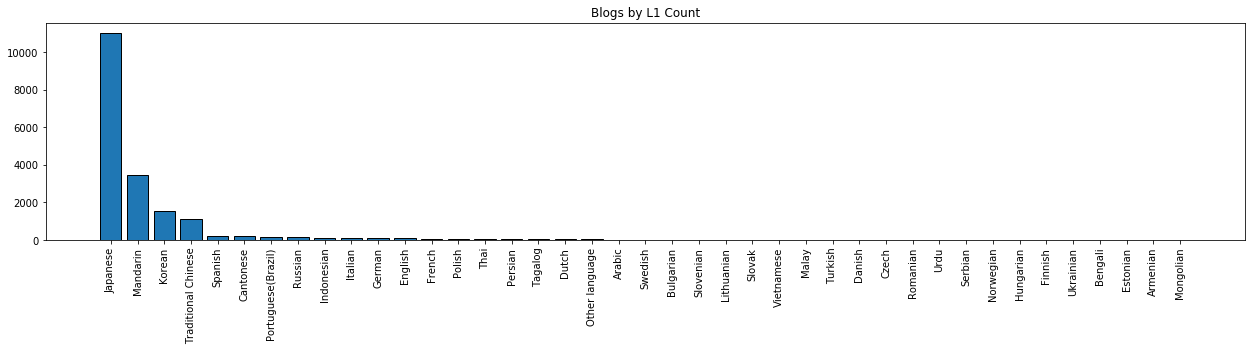

In [7]:
assess_language()

In [8]:
# Clean Data
del blog['Unnamed: 0']
blog.language = blog.language.mask(blog.language == 'Mandarin', 'Traditional Chinese').replace(['Persian', 'Arabic',
        'Bulgarian', 'Swedish', 'Slovenian', 'Slovak', 'Malay', 'Turkish','Romanian', 'Czech', 'Danish', 'Vietnamese',
        'Norwegian','Serbian','Other language','Lithuanian', 'Ukrainian', 'Finnish','Estonian','Bengali','Russian', 
        'Spanish','French', 'German', 'Cantonese','Mongolian', 'Tagalog', 'Polish', 'Dutch','Italian', 'Portuguese(Brazil)', 
        'Thai', 'Indonesian', 'Cantonese','Urdu', 'Hungarian','Korean','English','Armenian'], np.nan)
blog = blog.dropna().sample(frac=1)

del blog['title']
del blog['time']

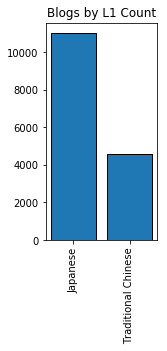

In [9]:
assess_language()

In [10]:
blog.info(verbose=False, memory_usage=False,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15580 entries, 6365 to 15053
Columns: 3 entries, id to language
dtypes: int64(1), object(2)

In [11]:
# Confirmation that there are no more null values
blog.isnull().values.any()

False

In [12]:
def lettercheck(val):
    reLetters = re.compile('[^a-zA-Z]')
    onlyletters = reLetters.sub('', val)
    return len(onlyletters)/len(val)

In [13]:
blog['letters_per'] = blog.content.apply(lettercheck)
print('Removing Blogs with less than 70% letter percentage: {}'.format(blog.loc[blog['letters_per'] <= .7].content.count()))
blog = blog.loc[blog['letters_per'] > .7]

Removing Blogs with less than 70% letter percentage: 1361


In [14]:
%%time
nlp = spacy.load('en')

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

/anaconda3/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



CPU times: user 674 ms, sys: 129 ms, total: 802 ms
Wall time: 673 ms


In [15]:
%%time
docs = []
tokens = []
lemma = []
pos = []
deps = []
ents = []

def insert_null(l):
    return [(w if w else '0') for w in l]

# Create doc and len features for processing
for doc in nlp.pipe(blog['content'].astype('unicode').values,batch_size = 10, n_threads=4):
    if doc.is_parsed:
        docs.append(doc)
    else:
        # Add blanks if parse fails
        docs.append(None)
        
blog['doc'] = docs
blog['len'] = blog.doc.apply(len)

# reduce blog size for neuralnet processing
blog_max_length = 150
reduced_blog_set = blog[blog.len <= blog_max_length].copy()

# apply features
reduced_blog_set['tokens'] = reduced_blog_set.doc.apply(lambda doc: insert_null([tok.text for tok in doc]))
reduced_blog_set['lemma'] = reduced_blog_set.doc.apply(lambda doc: insert_null([tok.lemma_ for tok in doc]))
reduced_blog_set['pos'] = reduced_blog_set.doc.apply(lambda doc: insert_null([tok.pos_ for tok in doc]))
reduced_blog_set['deps'] = reduced_blog_set.doc.apply(lambda doc: insert_null([tok.dep_ for tok in doc]))
reduced_blog_set['ents'] = reduced_blog_set.doc.apply(lambda doc: insert_null([tok.ent_type_ for tok in doc]))

CPU times: user 6min 58s, sys: 1min 16s, total: 8min 14s
Wall time: 4min 11s


In [16]:
def dict2val(l):
    l = list(set([j for i in l for j in i]))
    d = {}
    
    d['0'] = 1
    
    c = 2
    for v in l:
        d[v] = c
        c = c+1
    return d

def convert_to_matrix(l,d):
    newl = []
    c = 0
    
    for v in l:
        if v in d.keys():
            newl.append(d[v])
        else:
            newl.append(0)
        c += 1
    
    for empty in range(c,blog_max_length):
        newl.append(0)
        
    return (newl)

In [17]:
[ print(i,c, end=' | ') for i,c in enumerate(list(reduced_blog_set.columns))];

0 id | 1 content | 2 language | 3 letters_per | 4 doc | 5 len | 6 tokens | 7 lemma | 8 pos | 9 deps | 10 ents | 

In [18]:
posdict = dict2val(reduced_blog_set.pos.tolist())
lemmadict = dict2val(reduced_blog_set.lemma.tolist())
depsdict = dict2val(reduced_blog_set.deps.tolist())
entsdict = dict2val(reduced_blog_set.ents.tolist())

word_vector_list = []

for index, row in reduced_blog_set.iterrows():
    lemmanp = convert_to_matrix(row[7],lemmadict)
    posnp = convert_to_matrix(row[8],posdict)
    depsnp = convert_to_matrix(row[9],depsdict)
    entsnp = convert_to_matrix(row[10],entsdict)
    word_vector_list.append(np.asarray([posnp,lemmanp,depsnp,entsnp]))

reduced_blog_set['word_vector'] = word_vector_list

__Sentence Parser__

__Word Vectorize w/ Gensim__

_Figuring Out How To Reduce Code Run Length_

<a id="sec2"></a>

# <span style="color:darkblue">2. Exploring the Data</span>  <a href='#top'>(top)</a>

### <span style="color:darkred">NLP: Spell Check, Tokenization, Collocations, Parts of Speech, and Syntax</span>  <a href='#top'>(top)</a>

__Raw IDF Calculation__

Inverse Document Freq Equation:</center>
$$idf_t=log \dfrac N{df_t}$$

_Doc Frequency Vectorization with IDF:_
$$tf-idf_{t,d}=(tf_{t,d})(idf_t)$$





__Additional Features__

__General Text Analysis__

__Backup File__

In [19]:
reduced_blog_set.to_csv('processed_blog_data.csv')

<a id="feature"></a>

# <span style="color:darkblue">2. Feature Processing:</span>  <a href='#top'>(top)</a>

In [20]:
%%time
# For backup
reduced_blog_set.to_csv('blogfeatures.csv')

CPU times: user 12.2 s, sys: 175 ms, total: 12.3 s
Wall time: 12.5 s


In [21]:
# For second notebook
%store reduced_blog_set

Stored 'reduced_blog_set' (DataFrame)


<a id="sec3"></a>